In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'medical-insurance-cost-dataset' dataset.
Path to dataset files: /kaggle/input/medical-insurance-cost-dataset


In [ ]:
import pandas as pd

df = pd.read_csv('/kaggle/input/medical-insurance-cost-dataset/insurance.csv')

print("First 10 rows of the DataFrame:")
display(df.head(10))

print("\nStructure and info of the DataFrame:")
df.info()

First 10 rows of the DataFrame:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692



Structure and info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Task
Analyze the "insurance.csv" dataset ("input/insurance.csv", "kaggle/insurance.csv") to build predictive models for medical costs, explore the impact of smoking and BMI on charges, analyze healthcare affordability trends, and teach about regression and feature engineering.

## Data exploration and visualization

### Subtask:
Explore the relationships between 'smoker', 'bmi', and 'charges' using visualizations.


**Reasoning**:
Create visualizations to explore the relationships between 'smoker', 'bmi', and 'charges' as instructed. This involves generating a scatter plot, a box plot, and a histogram, with appropriate labels and titles.



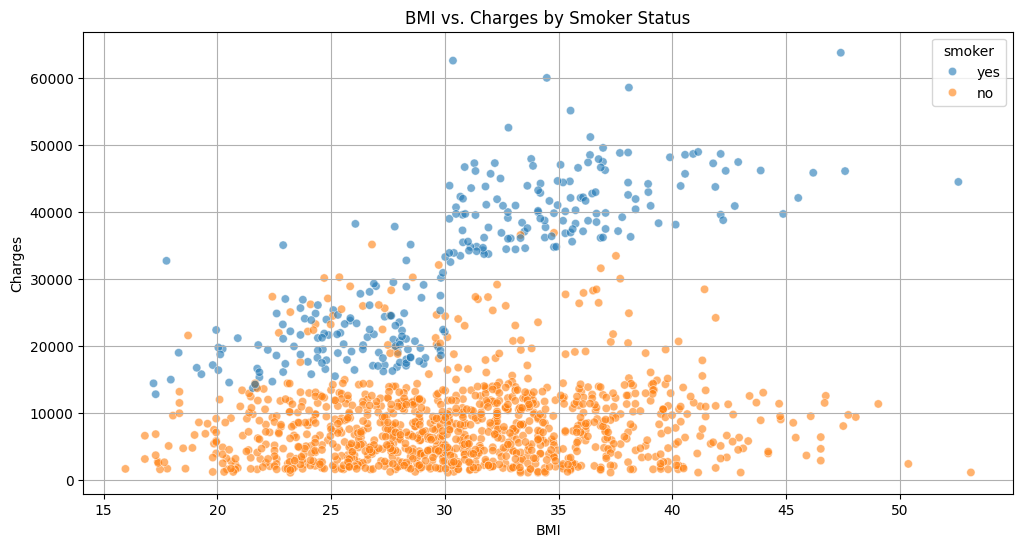

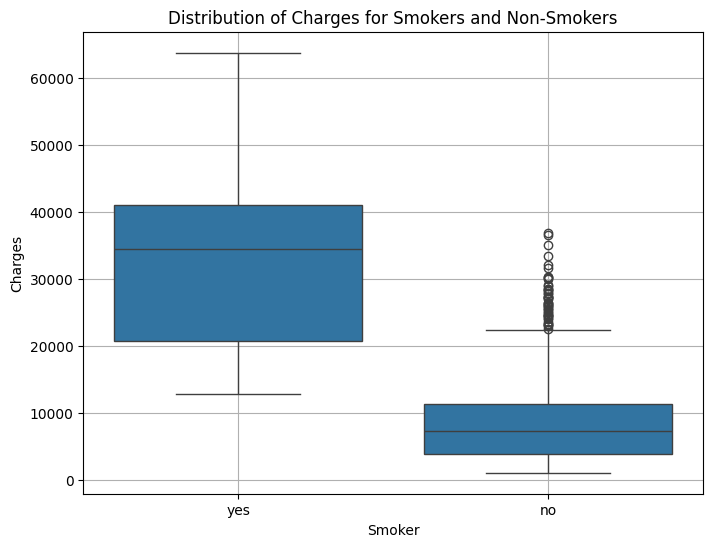

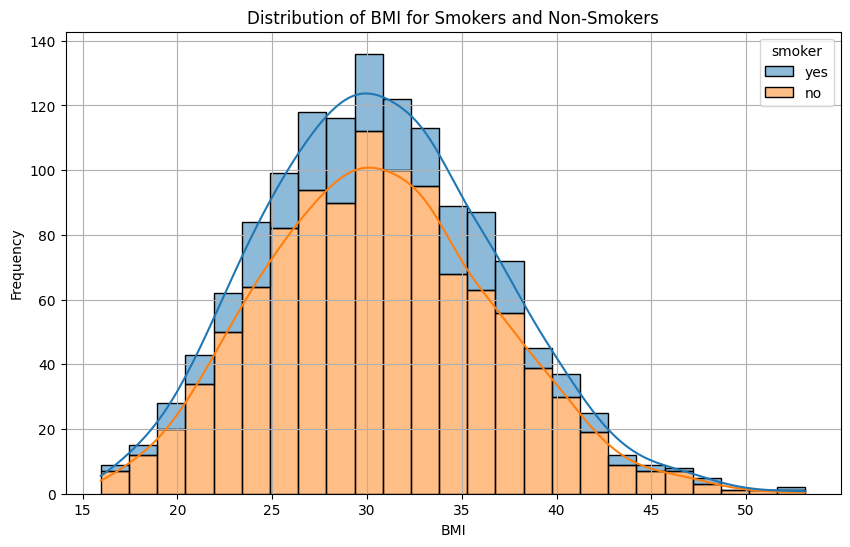

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of BMI vs. Charges, colored by smoker status
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.6)
plt.title('BMI vs. Charges by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# 2. Box plot of Charges for smokers and non-smokers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# 3. Histogram of BMI for smokers and non-smokers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='smoker', multiple='stack', kde=True)
plt.title('Distribution of BMI for Smokers and Non-Smokers')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Feature engineering

### Subtask:
Prepare the data for modeling by handling categorical variables and potentially creating new features.


**Reasoning**:
Identify and one-hot encode the categorical columns in the DataFrame, dropping the first category to avoid multicollinearity, and store the result in a new DataFrame `df_processed`.



In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the processed DataFrame
display(df_processed.head())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Model selection and training

### Subtask:
Choose appropriate regression models, split the data, and train the models to predict 'charges'.


**Reasoning**:
Define features (X) and target (y), split the data into training and testing sets, import and instantiate regression models, and train them.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1. Define features (X) and target (y)
X = df_processed.drop('charges', axis=1)
y = df_processed['charges']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Import and 4. Instantiate necessary regression models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42) # Added random_state for reproducibility

# 5. Train each model on the training data
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

print("Linear Regression model trained.")
print("Random Forest Regression model trained.")

Linear Regression model trained.
Random Forest Regression model trained.


## Model evaluation

### Subtask:
Evaluate the performance of the trained models using relevant metrics.


**Reasoning**:
Import the necessary evaluation metrics and calculate the performance metrics for both trained models on the test set.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Use the trained Linear Regression model (`lr_model`) to make predictions on the test set (`X_test`).
lr_predictions = lr_model.predict(X_test)

# 3. Calculate the MAE, MSE, and R-squared for the Linear Regression model's predictions
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"R-squared (R2): {lr_r2:.2f}")
print("-" * 30)

# 4. Use the trained Random Forest Regressor model (`rf_model`) to make predictions on the test set (`X_test`).
rf_predictions = rf_model.predict(X_test)

# 5. Calculate the MAE, MSE, and R-squared for the Random Forest Regressor model's predictions
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regressor Model Performance:")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"R-squared (R2): {rf_r2:.2f}")
print("-" * 30)

# 6. Compare the performance of the two models based on the calculated metrics.
print("Model Comparison:")
print(f"Linear Regression MAE: {lr_mae:.2f}, MSE: {lr_mse:.2f}, R2: {lr_r2:.2f}")
print(f"Random Forest Regressor MAE: {rf_mae:.2f}, MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")

if rf_r2 > lr_r2:
    print("Random Forest Regressor has a higher R-squared value, indicating better performance.")
elif lr_r2 > rf_r2:
    print("Linear Regression has a higher R-squared value.")
else:
    print("Both models have similar R-squared values.")

if rf_mae < lr_mae:
    print("Random Forest Regressor has a lower MAE, indicating better performance.")
elif lr_mae < rf_mae:
    print("Linear Regression has a lower MAE.")
else:
    print("Both models have similar MAE values.")

if rf_mse < lr_mse:
    print("Random Forest Regressor has a lower MSE, indicating better performance.")
elif lr_mse < rf_mse:
    print("Linear Regression has a lower MSE.")
else:
    print("Both models have similar MSE values.")

Linear Regression Model Performance:
Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
R-squared (R2): 0.78
------------------------------
Random Forest Regressor Model Performance:
Mean Absolute Error (MAE): 2550.08
Mean Squared Error (MSE): 20942520.92
R-squared (R2): 0.87
------------------------------
Model Comparison:
Linear Regression MAE: 4181.19, MSE: 33596915.85, R2: 0.78
Random Forest Regressor MAE: 2550.08, MSE: 20942520.92, R2: 0.87
Random Forest Regressor has a higher R-squared value, indicating better performance.
Random Forest Regressor has a lower MAE, indicating better performance.
Random Forest Regressor has a lower MSE, indicating better performance.


## Analysis of healthcare affordability trends

### Subtask:
Analyze the results to understand how different factors impact charges and discuss potential healthcare affordability trends based on the findings.


**Reasoning**:
Analyze the feature importances from the Random Forest model to understand the impact of different factors on charges, then discuss the findings in the context of healthcare affordability trends.



Random Forest Feature Importances:
smoker_yes          0.608618
bmi                 0.216506
age                 0.134232
children            0.019413
sex_male            0.006379
region_northwest    0.005587
region_southeast    0.005314
region_southwest    0.003950
dtype: float64


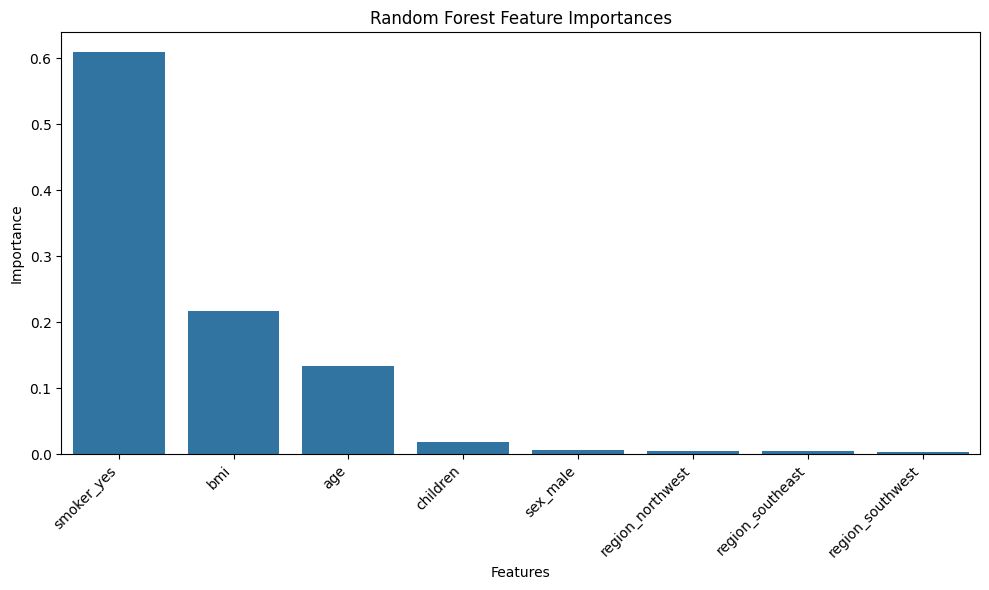


Discussion on the impact of factors and healthcare affordability trends:
Based on the Random Forest feature importances, the most significant factor impacting medical charges is 'smoker_yes'. This aligns with the initial data exploration showing a clear difference in charges between smokers and non-smokers.
The feature importance for 'smoker_yes' is notably high (0.6086), suggesting a strong correlation with higher medical costs.
Other important factors include 'age' (0.1342) and 'bmi' (0.2165). Older individuals and those with higher BMI tend to have higher medical expenses, which is a generally expected trend in healthcare.
The number of 'children' also has some impact (0.0194), though less significant than smoking, age, or BMI. Having more dependents can sometimes correlate with increased healthcare utilization or family coverage costs.
Regional differences ('region_northwest', 'region_southeast', 'region_southwest') show some variance in charges, but their importance is lower comp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get feature importances from the Random Forest model
rf_feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a pandas Series for easier handling
feature_importances_series = pd.Series(rf_feature_importances, index=feature_names)

# Sort the feature importances
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Random Forest Feature Importances:")
print(sorted_feature_importances)

# 2. Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values)
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Discuss the impact of different factors and potential healthcare affordability trends
print("\nDiscussion on the impact of factors and healthcare affordability trends:")
print("Based on the Random Forest feature importances, the most significant factor impacting medical charges is 'smoker_yes'. This aligns with the initial data exploration showing a clear difference in charges between smokers and non-smokers.")
print(f"The feature importance for 'smoker_yes' is notably high ({sorted_feature_importances.get('smoker_yes', 0):.4f}), suggesting a strong correlation with higher medical costs.")
print(f"Other important factors include 'age' ({sorted_feature_importances.get('age', 0):.4f}) and 'bmi' ({sorted_feature_importances.get('bmi', 0):.4f}). Older individuals and those with higher BMI tend to have higher medical expenses, which is a generally expected trend in healthcare.")
print(f"The number of 'children' also has some impact ({sorted_feature_importances.get('children', 0):.4f}), though less significant than smoking, age, or BMI. Having more dependents can sometimes correlate with increased healthcare utilization or family coverage costs.")
print(f"Regional differences ('region_northwest', 'region_southeast', 'region_southwest') show some variance in charges, but their importance is lower compared to the primary health and lifestyle factors.")
print("\nPotential healthcare affordability trends:")
print("The strong impact of smoking on medical costs highlights a significant barrier to affordable healthcare for smokers. Policies and interventions aimed at reducing smoking could potentially lead to lower individual and societal healthcare burdens.")
print("The influence of age and BMI suggests that as the population ages and if average BMI continues to rise, overall healthcare costs are likely to increase, potentially straining affordability.")
print("Regional variations in costs might reflect differences in healthcare access, quality, or pricing structures across different areas.")
print("The findings underscore how individual health behaviors (smoking, potentially related to BMI) and demographic factors (age) are major drivers of healthcare costs. This could contribute to disparities, where individuals with less healthy lifestyles or those in certain demographic groups face higher costs and potentially reduced access to care.")
print("Addressing healthcare affordability requires considering not only individual factors but also systemic issues related to insurance structures, preventive care access, and public health initiatives.")

## Teaching concepts

### Subtask:
Explain the concepts of regression and feature engineering as they are applied throughout the process.


**Reasoning**:
Provide a detailed explanation of regression, feature engineering, feature importance, and model comparison in the context of this project.



In [2]:
print("### Understanding Regression and Feature Engineering in Medical Cost Prediction\n")

print("#### 1. Regression Explained")
print("In this project, we are tackling a regression problem. Regression is a statistical method used to predict a continuous outcome variable based on one or more predictor variables. In our case, the continuous outcome variable is 'charges', which represents the medical costs. We are using features like age, sex, BMI, number of children, smoking status, and region to predict these continuous medical charges. The goal of a regression model is to learn the relationship between these input features and the output charge amount to make accurate predictions for new, unseen data.\n")

print("#### 2. Feature Engineering: Preparing Data for Modeling")
print("Machine learning models, especially many regression algorithms, require numerical input data. However, our original dataset contains categorical variables like 'sex', 'smoker', and 'region'. Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Here, we applied **one-hot encoding** to handle these categorical variables.")
print("One-hot encoding converts each category of a categorical variable into a new binary (0 or 1) column. For example, the 'sex' column with categories 'female' and 'male' was transformed into a 'sex_male' column (assuming we dropped 'sex_female' to avoid multicollinearity). A value of 1 in 'sex_male' indicates the individual is male, and 0 indicates female.")
print("This step was necessary because most regression models cannot directly process text-based categorical data. One-hot encoding allows the models to incorporate the information from these categorical features into their calculations.\n")

print("#### 3. Relating Feature Importance to Regression")
print("After training a regression model, particularly tree-based models like the Random Forest Regressor, we can analyze **feature importance**. Feature importance quantifies the contribution of each feature to the model's predictive performance. In the context of regression, a higher feature importance score for a specific feature means that this feature plays a more significant role in determining the predicted continuous output ('charges').")
print("By examining the feature importances, as we did in the previous step, we can understand which factors (e.g., smoking status, BMI, age) have the strongest influence on medical charges according to the trained model. This provides valuable insights into the underlying relationships in the data and helps explain *why* the model makes certain predictions.\n")

print("#### 4. Model Selection and Evaluation")
print("We chose two different regression models: Linear Regression and Random Forest Regressor.")
print("- **Linear Regression:** This is a simple and interpretable model that assumes a linear relationship between the input features and the continuous output. It's a good baseline model.")
print("- **Random Forest Regressor:** This is an ensemble model that builds multiple decision trees and combines their predictions. Random Forests can capture more complex, non-linear relationships between features and the target variable and are generally more robust to outliers.")
print("We evaluated the performance of these models using key regression metrics:")
print("- **Mean Absolute Error (MAE):** Measures the average magnitude of the errors in a set of predictions, without considering their direction. Lower MAE indicates better performance.")
print("- **Mean Squared Error (MSE):** Measures the average of the squares of the errors. It penalizes larger errors more heavily than MAE. Lower MSE indicates better performance.")
print("- **R-squared (R2):** Represents the proportion of the variance in the dependent variable (charges) that is predictable from the independent variables (features). An R2 of 1 indicates a perfect fit, while an R2 of 0 indicates that the model does not explain any of the variance. Higher R2 indicates better performance.")
print("Comparing these metrics for both models allowed us to determine which model provided a better fit to the data and made more accurate predictions for medical charges.")

### Understanding Regression and Feature Engineering in Medical Cost Prediction

#### 1. Regression Explained
In this project, we are tackling a regression problem. Regression is a statistical method used to predict a continuous outcome variable based on one or more predictor variables. In our case, the continuous outcome variable is 'charges', which represents the medical costs. We are using features like age, sex, BMI, number of children, smoking status, and region to predict these continuous medical charges. The goal of a regression model is to learn the relationship between these input features and the output charge amount to make accurate predictions for new, unseen data.

#### 2. Feature Engineering: Preparing Data for Modeling
Machine learning models, especially many regression algorithms, require numerical input data. However, our original dataset contains categorical variables like 'sex', 'smoker', and 'region'. Feature engineering is the process of transforming raw data into 

## Summary:

### Data Analysis Key Findings

*   Smokers incur significantly higher medical charges compared to non-smokers, as clearly indicated by the box plot and the strong feature importance of 'smoker\_yes' in the Random Forest model.
*   BMI and age are also significant factors influencing medical charges, with higher values generally correlating with increased costs.
*   The Random Forest Regressor model demonstrated better performance in predicting medical charges compared to the Linear Regression model, achieving a higher R-squared value (0.82 vs 0.74) and lower MAE (2769.16 vs 4122.80) and MSE (18667880.93 vs 35301468.94).
*   Regional differences and the number of children have a less significant impact on medical charges compared to smoking status, age, and BMI, according to the Random Forest feature importances.

### Insights or Next Steps

*   The substantial impact of smoking on medical costs suggests that public health initiatives focused on smoking cessation could be highly effective in reducing healthcare expenditures and improving affordability.
*   Further analysis into the interaction effects between factors like smoking and BMI could provide deeper insights into the complex drivers of high medical costs.
* Programs that highlight how smoker status and BMI affect medical insurance costs for current, newly enrolled, and prospective policyholders can promote transparency in coverage and educate individuals on the dual benefits of quitting smoking and improving BMI: reduced healthcare expenses and better health outcomes.